In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import ccf
from statsmodels.tsa.stattools import grangercausalitytests
#from statsmodels.tsa.vector_ar import var_model

### Dateset Link - https://github.com/ritvikmath/Time-Series-Analysis/blob/master/ice_cream_vs_heater.csv
### Since there was no downloaded file to use, I copied it to clipboard and used it.(Copy button in top-right)

In [54]:
#df = pd.read_clipboard(sep = ',')
#df


In [55]:
#df['Month'] = pd.to_datetime(df['Month']) # converting month in datetime format
#df.index = (df['Month']) # Setting the Month as index

In [56]:
#df.index

In [57]:
#df = df.drop('Month',axis=1)

In [58]:
#df

In [59]:
#print(pd.infer_freq(df.index))

In [60]:
#ice_cream_heater_df = ice_cream_heater_df.asfreq(pd.infer_freq(ice_cream_heater_df.index))
#df = df.asfreq(pd.infer_freq(df.index))# setting frequency to data to avoid any errors

In [61]:
# plotting the data
#plt.figure(figsize=(16,6))
#plt.plot(df['heater'],label = 'Heater')
#plt.plot(df['ice cream'],label = 'Ice Cream')
#plt.legend()

In [62]:
#df.describe()

In [63]:
#df = df.diff().dropna() # applying first difference to remove trend

In [64]:
#plt.figure(figsize=(16,6))
#plt.plot(df['heater'],label = 'Heater')
#plt.plot(df['ice cream'],label = 'Ice Cream')
#plt.legend()

In [65]:
#annual_volatility = df.groupby(df.index.year).std()
# checking volatility to know if the seasonality component is changing with time

In [66]:
#annual_volatility
# we can observe that seasonality is increasing(generally) as we go into the future

In [67]:
#df['ice_cream_annual_vol'] = df.index.map(lambda d: annual_volatility.loc[d.year, 'ice cream'])
#df['heater_annual_vol'] = df.index.map(lambda d: annual_volatility.loc[d.year, 'heater'])
#adding both the volatilities to the df so that we can use them later

In [68]:
#df

In [69]:
#df['ice cream'] = df['ice cream'] / df['ice_cream_annual_vol']
#df['heater'] = df['heater'] / df['heater_annual_vol']
#diving the data by their annual volatilities to stop the seasonlity component from increasing

In [70]:
#plt.figure(figsize=(16,6))
#plt.plot(df['heater'],label = 'Heater')
#plt.plot(df['ice cream'],label = 'Ice Cream')
#plt.legend()
# from the plot we can observe that there is no volatility in seasonality

In [71]:
#month_avgs = df.groupby(df.index.month).mean()
#calculating monthly mean

In [72]:
#print(month_avgs)

In [73]:
#df['ice_cream_month_avg'] = df.index.map(lambda d: month_avgs.loc[d.month, 'ice cream'])
#df['heater_month_avg'] = df.index.map(lambda d: month_avgs.loc[d.month, 'heater'])
#accuracy_score(t1,t2)

In [74]:
#df

In [75]:
#df['ice cream'] = df['ice cream'] - df['ice_cream_month_avg']
#df['heater'] = df['heater'] - df['heater_month_avg']
# subtracting the monthly mean from df to remove seasonality

In [76]:
#df

In [77]:
#plt.figure(figsize=(16,6))
#plt.plot(df['heater'],label = 'Heater')
#plt.plot(df['ice cream'],label = 'Ice Cream')
#plt.legend()

In [78]:
#adfuller(df['heater']),adfuller(df['ice cream'])
#adfuller test gave p<0.05 which says data is stationary now

In [79]:
#plot_pacf(df['heater'])
#plt.show()
# 2 lags are significant

In [80]:
#ccf(df['heater'],df['ice cream'])

### Granger causality test tells if one time series is in lag or lead of the other

In [81]:
#grangercausalitytests(df[['heater','ice cream']],maxlag = 10)# nothing significant is observed here

In [82]:
#grangercausalitytests(df[['ice cream','heater']],maxlag = 10)# nothing significant is observed here

In [83]:
#model = VAR(df[['ice cream', 'heater']])

In [84]:
#model1 = var_model.VAR(df[['ice cream', 'heater']]).fit(15)

In [85]:
#model1.summary()

In [91]:
#Here we can see the lags of one feature that can be used to predict values of other feature
# If prob(p) < 0.05, then the coefficient is statistically significant and we can include that term in our equation/model.
# for heater, we can observe that L1.heater, L2.heater are significant. So the eq wouls be heater(t) = w1*heater(t-1)+w2*heater(t-2)+e(t) 

In [5]:
df1 = pd.read_csv('Data/jena_climate_2009_2016.csv')
df1['Date Time'] = pd.to_datetime(df1['Date Time'])
df1.index = df1['Date Time']
df1 = df1.drop('Date Time',axis=1)

In [6]:
df1.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


In [8]:
#df1 = df1.asfreq(pd.infer_freq(df1.index))

In [34]:
df1

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
2016-12-31 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
2016-12-31 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2


<AxesSubplot:>

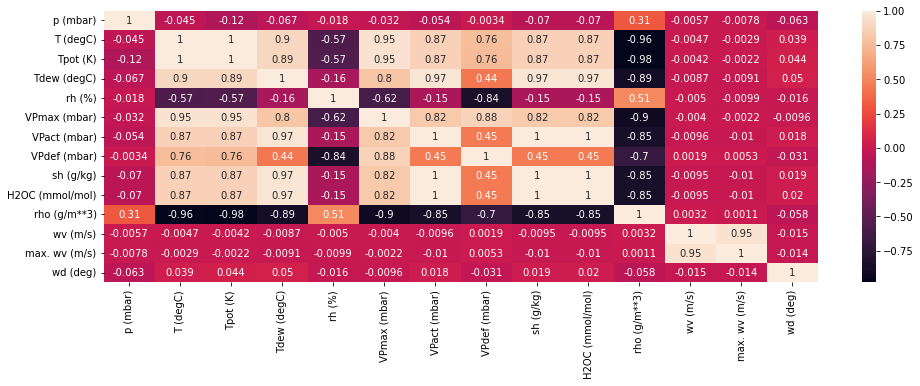

In [15]:
plt.figure(figsize = (16,5))
sns.heatmap(df1.corr(),annot=True)

In [22]:
adfuller(df1['rho (g/m**3)'])

(-10.431381394746827,
 1.6073858488219199e-18,
 97,
 420453,
 {'1%': -3.430365553081852,
  '5%': -2.8615468742762458,
  '10%': -2.566773658926636},
 1094404.9563857727)

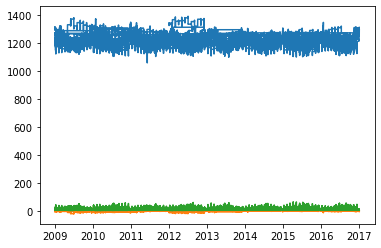

In [24]:
plt.plot(df1[['rho (g/m**3)','T (degC)','VPmax (mbar)']])

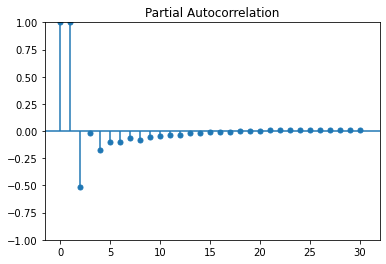

In [21]:
plot_pacf(df1['rho (g/m**3)'],lags = 30);

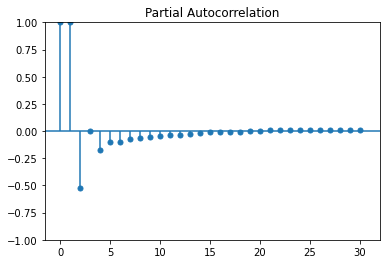

In [28]:
plot_pacf(df1['T (degC)'],lags = 30);

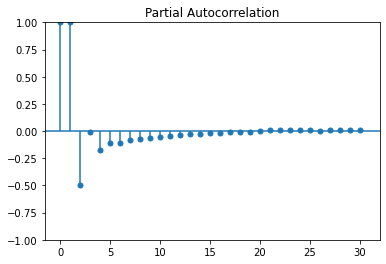

In [26]:
plot_pacf(df1['VPmax (mbar)'],lags = 30);

In [30]:
grangercausalitytests(df1[['rho (g/m**3)','T (degC)']],maxlag=15)# this test says that all lags are significant so I ignored it


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=65.0677 , p=0.0000  , df_denom=420547, df_num=1
ssr based chi2 test:   chi2=65.0682 , p=0.0000  , df=1
likelihood ratio test: chi2=65.0631 , p=0.0000  , df=1
parameter F test:         F=65.0677 , p=0.0000  , df_denom=420547, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=49.0364 , p=0.0000  , df_denom=420544, df_num=2
ssr based chi2 test:   chi2=98.0739 , p=0.0000  , df=2
likelihood ratio test: chi2=98.0625 , p=0.0000  , df=2
parameter F test:         F=49.0364 , p=0.0000  , df_denom=420544, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=93.1262 , p=0.0000  , df_denom=420541, df_num=3
ssr based chi2 test:   chi2=279.3833, p=0.0000  , df=3
likelihood ratio test: chi2=279.2905, p=0.0000  , df=3
parameter F test:         F=93.1262 , p=0.0000  , df_denom=420541, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=14

{1: ({'ssr_ftest': (65.06768625441325, 7.255703275412993e-16, 420547.0, 1),
   'ssr_chi2test': (65.06815041908155, 7.23520621614927e-16, 1),
   'lrtest': (65.0631172156427, 7.2537098050968e-16, 1),
   'params_ftest': (65.06768625427205, 7.255703275956589e-16, 420547.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (49.03638354252469, 5.084544091525603e-22, 420544.0, 2),
   'ssr_chi2test': (98.0739331077139, 5.052612781730936e-22, 2),
   'lrtest': (98.06249924236909, 5.081580954472477e-22, 2),
   'params_ftest': (49.036383542733546, 5.084544090439419e-22, 420544.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (93.12621649662137, 3.0218917077111026e-60, 420541.0, 3),
   'ssr_chi2test': (279.3832998106329, 2.879212872782738e-60, 3),
   'lrtest': (279.2905393221881, 3.015399520189974e-60, 3),
   'params_ftest': (93.12621649651935, 3.021891708131092e-60, 420541.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0

In [31]:
grangercausalitytests(df1[['rho (g/m**3)','VPmax (mbar)']],maxlag=15)# this test says that all lags are significant so I ignored it


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=13.0239 , p=0.0003  , df_denom=420547, df_num=1
ssr based chi2 test:   chi2=13.0240 , p=0.0003  , df=1
likelihood ratio test: chi2=13.0238 , p=0.0003  , df=1
parameter F test:         F=13.0239 , p=0.0003  , df_denom=420547, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=216.0296, p=0.0000  , df_denom=420544, df_num=2
ssr based chi2 test:   chi2=432.0644, p=0.0000  , df=2
likelihood ratio test: chi2=431.8426, p=0.0000  , df=2
parameter F test:         F=216.0296, p=0.0000  , df_denom=420544, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=144.1631, p=0.0000  , df_denom=420541, df_num=3
ssr based chi2 test:   chi2=432.4966, p=0.0000  , df=3
likelihood ratio test: chi2=432.2743, p=0.0000  , df=3
parameter F test:         F=144.1631, p=0.0000  , df_denom=420541, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=11

{1: ({'ssr_ftest': (13.023933539498872, 0.00030757082500439543, 420547.0, 1),
   'ssr_chi2test': (13.024026446595151, 0.0003075199057704233, 1),
   'lrtest': (13.023824780248106, 0.00030755302368875177, 1),
   'params_ftest': (13.02393353956673, 0.00030757082499413704, 420547.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (216.02963330806784, 1.6892116571325443e-94, 420544.0, 2),
   'ssr_chi2test': (432.064403525313, 1.5080191655924092e-94, 2),
   'lrtest': (431.84260786511004, 1.6848807821790764e-94, 2),
   'params_ftest': (216.0296333082349, 1.6892116568180288e-94, 420544.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (144.1631301645215, 2.2650937386640543e-93, 420541.0, 3),
   'ssr_chi2test': (432.49658937722495, 2.0206495483388324e-93, 3),
   'lrtest': (432.2743494028691, 2.257556860020641e-93, 3),
   'params_ftest': (144.16313016454492,
    2.2650937385061355e-93,
    420541.0,
    3.0)},
   array([[0., 0., 0., 1., 0., 0.

In [44]:
#model = var_model.VAR(df1[['p (mbar)', 'rh (%)']]).fit(15)
df = df1[['rho (g/m**3)','VPmax (mbar)','T (degC)']]
model = VAR(df1[['rho (g/m**3)','VPmax (mbar)','T (degC)']])


C:\Users\dreddy86\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dreddy86\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [36]:
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
# no significant improvement after lag2 but I took lag 3 as the order

Lag Order = 1
AIC :  -10.296114005370946
Lag Order = 2
AIC :  -10.975973989847455
Lag Order = 3
AIC :  -10.984245927972546
Lag Order = 4
AIC :  -11.053254056694216
Lag Order = 5
AIC :  -11.084944762892464
Lag Order = 6
AIC :  -11.111332022849938
Lag Order = 7
AIC :  -11.171190680486637
Lag Order = 8
AIC :  -11.200535831615005
Lag Order = 9
AIC :  -11.215442323506936


In [37]:
result = model.fit(3)

In [39]:
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 17, Nov, 2022
Time:                     20:41:53
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -10.9835
Nobs:                     420548.    HQIC:                  -10.9840
Log likelihood:           519536.    FPE:                1.69669e-05
AIC:                     -10.9842    Det(Omega_mle):     1.69657e-05
--------------------------------------------------------------------
Results for equation rho (g/m**3)
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   1.111560         0.170587            6.516           0.000
L1.rho (g/m**3)         1.529745         0.007411          206.409           0.000
L1.VPmax (mbar)         0.287357         0.01

In [41]:
#model.forecast(df2,steps = 10)
lag_order = result.k_ar
lag_order

3

In [45]:
forecast_input = df.values[-lag_order:]
forecast_input

array([[1288.39,    4.84,   -3.16],
       [1293.56,    4.46,   -4.23],
       [1296.38,    4.27,   -4.82]])

In [50]:
nobs = 294385
fc = result.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecastCosmic

,rho (g/m**3)_2d,VPmax (mbar)_2d,T (degC)_2d
Date Time,,,
2011-05-26 04:10:00,1297.908700,4.139822,-5.138041
2011-05-26 04:20:00,1298.706396,4.059300,-5.304889
2011-05-26 04:30:00,1299.107300,4.011682,-5.389390
2011-05-26 04:40:00,1299.290666,3.985243,-5.428803
2011-05-26 04:50:00,1299.354883,3.972021,-5.443452
...,...,...,...
2016-12-31 23:20:00,1216.022224,13.585562,9.462136
2016-12-31 23:30:00,1216.022224,13.585562,9.462136
2016-12-31 23:40:00,1216.022224,13.585562,9.462136


In [53]:
df[-nobs:]

,rho (g/m**3),VPmax (mbar),T (degC)
Date Time,,,
2011-05-26 04:10:00,1234.27,9.20,5.75
2011-05-26 04:20:00,1233.03,9.35,5.99
2011-05-26 04:30:00,1232.48,9.41,6.08
2011-05-26 04:40:00,1230.57,9.66,6.46
2011-05-26 04:50:00,1227.80,10.06,7.05
...,...,...,...
2016-12-31 23:20:00,1292.98,4.52,-4.05
2016-12-31 23:30:00,1289.44,4.77,-3.35
2016-12-31 23:40:00,1288.39,4.84,-3.16
